In [349]:
#Import for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import API Requirements
import requests
import spotipy

#Import JSON
import json

#import SQL
import sqlalchemy
from sqlalchemy import create_engine

In [350]:
#Authentication variables
CLIENT_ID = '744aee4ee39a4b6787e645452d1d36b4'
CLIENT_SECRET = '7b72ec76041d4818b061e91ce613d780'

In [351]:
#Authenticate myself with a post request including the url and my creds
AUTH_URL = 'https://accounts.spotify.com/api/token'
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

In [352]:
#Print the response to my request
print(auth_response.status_code)

200


In [353]:
#convert the response, "auth_response" to json using .json()
auth_response_data = auth_response.json()

In [354]:
#pull the access token from the response and save it in a variable "access_token"
access_token = auth_response_data['access_token']

In [355]:
#save the token to the API to use in my GET request headers
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [356]:
#Access endpoints base URL for spotify
BASE_URL = 'https://api.spotify.com/v1/'

In [357]:
#Variables for artist data I want to collect, artist-ids
lil_baby = '5f7VJjfbwm532GiveGC0ZK'
drake = '3TVXtAsR1Inumwj472S9r4'
lil_uzi_vert = '4O15NlyKLIASxsJ0PrXPfz'

desArtistStr = (input("Enter up to 5 artists(Separated by commas): "))

Enter up to 5 artists(Separated by commas): Drake, Migos


In [358]:
desArtistList = desArtistStr.split (", ")

In [359]:
desArtistList[0]

'Drake'

In [360]:
rows = []
for entry in desArtistList:
    print(entry, "request")
    r = requests.get(BASE_URL + 'search?q=' + entry + '&type=artist&limit=1', headers = headers)
    print(artIdReq.status_code)
    d = r.json()
    #print(d)
    artistInfo = d['artists']
    for item in artistInfo['items']:
        artistName = item['name']
        artistID = item['id']
        #print("Artist ID for", artistName, ":", artistID)
        
        artistData = []
        artistData.append(item['name'])
        artistData.append(item['id'])
        artistData.append(item['genres'][0])
        artistData.append(item['popularity'])
        for key in item['followers']:
            if key == 'total':
                artistData.append(item['followers'][key])
        rows.append(artistData)

pd.DataFrame(rows, columns=['Name','Artist ID', 'Genre', 'Popularity', 'Followers']).head()

Drake request
200
Migos request
200


,Name,Artist ID,Genre,Popularity,Followers
0,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,98,55780066
1,Migos,6oMuImdp5ZcFhWP0ESe6mG,atl hip hop,89,11612669


In [279]:
#do a GET request. Specify the url & the headers set for authentication
#you can input parameters (params=) as to what limits you want on the json file that will be returned to you
r = requests.get(BASE_URL + 'search?q=' + desArtist + '&type=artist&limit=1', headers = headers)



In [280]:
#convert whatever is returned into JSON
d = r.json()


d

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Beyonce&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6vWDO969PvNqNYHIOW5v0m'},
    'followers': {'href': None, 'total': 28031952},
    'genres': ['dance pop', 'pop', 'post-teen pop', 'r&b'],
    'href': 'https://api.spotify.com/v1/artists/6vWDO969PvNqNYHIOW5v0m',
    'id': '6vWDO969PvNqNYHIOW5v0m',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5ebd3d058be8485c8583703b6d2',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174d3d058be8485c8583703b6d2',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178d3d058be8485c8583703b6d2',
      'width': 160}],
    'name': 'Beyoncé',
    'popularity': 88,
    'type': 'artist',
    'uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?query=Beyonce&typ

In [281]:
#Get artist Key
artistInfo = d['artists']
for item in artistInfo['items']:
    artistName = item['name']
    artistID = item['id']
    print("Artist ID for", artistName, ":", artistID)
    #for key in item:
        #if key == 'id':
            #print(key, ":", item[key])

    

Artist ID for Beyoncé : 6vWDO969PvNqNYHIOW5v0m


In [284]:
#Get Artist Data
artIdReq = requests.get(BASE_URL + 'artists/' + artistID, headers = headers)

In [285]:
artIdReq.status_code

200

In [288]:
reqData = artIdReq.json()


reqData

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6vWDO969PvNqNYHIOW5v0m'},
 'followers': {'href': None, 'total': 28031952},
 'genres': ['dance pop', 'pop', 'post-teen pop', 'r&b'],
 'href': 'https://api.spotify.com/v1/artists/6vWDO969PvNqNYHIOW5v0m',
 'id': '6vWDO969PvNqNYHIOW5v0m',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebd3d058be8485c8583703b6d2',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174d3d058be8485c8583703b6d2',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178d3d058be8485c8583703b6d2',
   'width': 160}],
 'name': 'Beyoncé',
 'popularity': 88,
 'type': 'artist',
 'uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m'}

In [294]:
#for key in reqData:
#    print(key)

print(reqData['name'])

Beyoncé


In [291]:
for artist in d['artists']:
    print("Artist:", artist['name'])
    print("Popularity:",artist['popularity'])
    print("Genres:", artist['genres'][0:2])
    for key in artist['followers']:
        if key == "total":
            print("Followers:", artist['followers'][key])
    print("-----")

TypeError: string indices must be integers

In [49]:
followersList = []
artistsList = []
popularityList = []

In [50]:
for artist in d['artists']:
    artistsList.append(artist['name'])
    popularityList.append(artist['popularity'])
    for key in artist['followers']:
        if key == 'total':
            followersList.append(artist['followers'][key])
            
print(rappers)
print(popularity)
print(followers)

['Lil Baby', 'Drake', 'Lil Uzi Vert']
[95, 98, 91]
[7567982, 55780066, 11684670]


<BarContainer object of 3 artists>

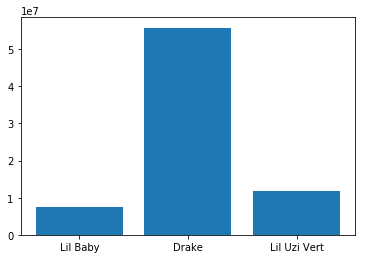

In [52]:
plt.bar(rappers, followers)

In [58]:
type(d)

dict

In [178]:
rows=[]
for artist in d['artists']:
    artistData = []
    artistData.append(artist['name'])
    artistData.append(artist['id'])
    artistData.append(artist['genres'][0])
    artistData.append(artist['popularity'])
    for key in artist['followers']:
        if key == 'total':
            artistData.append(artist['followers'][key])
    rows.append(artistData)
    
pd.DataFrame(rows, columns=['Name','Artist ID', 'Genre', 'Popularity', 'Followers']).head()

,Name,Artist ID,Genre,Popularity,Followers
0,Lil Baby,5f7VJjfbwm532GiveGC0ZK,atl hip hop,95,7567982
1,Drake,3TVXtAsR1Inumwj472S9r4,canadian hip hop,98,55780066
2,Lil Uzi Vert,4O15NlyKLIASxsJ0PrXPfz,melodic rap,91,11684670
